In [1]:
import scanpy as sc
import scanpy.external as sce
#sc.logging.print_versions()
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
import os,sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker
import palantir

Memory usage: current 0.19 GB, difference +0.19 GB


In [ ]:
# add the utility function folder to PATH
import sys
sys.path.append(os.path.abspath("utility_functions/"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params # this adjust mpl.rcParams, almost nothing to import, import after scanpy to overwrite rc.Params
import rz_utility_spring as srz

# Select hvg 

In [1]:
import scanpy as sc
import scanpy.external as sce
#sc.logging.print_versions()
#sc.logging.print_memory_usage()
#sc.settings.verbosity = 2
import os,sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker

In [2]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params # this adjust mpl.rcParams, almost nothing to import, import after scanpy to overwrite rc.Params
import rz_utility_spring as srz

python version: 3.8.18


In [22]:
adata = sc.read_h5ad('backups/clean_good_cells_15372x2000_231009_10h46.h5ad')

In [23]:
adata = adata.raw.to_adata()

In [24]:
adata.raw = adata

In [25]:
sc.pp.filter_genes(adata, min_counts = 10)
sc.pp.filter_genes(adata, min_cells = 5)

In [27]:

sc.pp.normalize_total(adata, target_sum = 1e4)
#logaritmize data
sc.pp.log1p(adata)
#select highly variable genes according to scanpy tutorial. Can also try describe higly variable genes by Fano 
#factor as in spring plot and just name them "highly variable genes" for scanpy processing
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, flavor='cell_ranger')
#save "raw" data (not scalled, not log)
#filter adata, only highly variable genes remain
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)

/opt/anaconda3/envs/palantir/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [28]:
adata

AnnData object with n_obs × n_vars = 15372 × 3324
    obs: 'barcode', 'library', 'total_counts', 'pct_counts_mito', 'conditions', 'conditions2', 'preservation', 'method', 'doublet_score', 'potential_doublet', 'top3pct_dbtl_score', 'top5pct_dbtl_score', 'top10pct_dbtl_score', 'sp_cl_all_cells_w_dblts_spring_500', 'removed_as_dblt1', 'sp_cl_all_cells_wo_dblt1_spring_500', 'removed_as_dblt2', 'no_dblt', 'n_counts', 'pheno_leiden', 'pheno_leiden_res_0.1', 'pheno_leiden_res_0.2', 'pheno_leiden_res_0.3', 'pheno_leiden_res_0.4', 'sp_cl_9', 'sp_cl_10', 'sp_cl_11', 'sp_cl_12', 'sp_cl_13', 'cell_typist_pred'
    var: 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'X_lin_cptt', 'X_log_z', 'conditions2_colors', 'conditions_colors', 'draw_graph', 'neighbors', 'pca', 'preservation_colors', 'umap', 'log1p', 'hvg'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

## Regress out cell cycle genes using scanpy.pp.regress_out function

In [30]:
cell_cycle_genes = [x.strip() for x in open('./data/regev_lab_cell_cycle_genes.txt')]

In [32]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [34]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [36]:
#sc.tl.score_genes(adata, gene_list=gene_list,ctrl_size=len(gene_list), score_name = 'cell_cycle')
sc.pp.regress_out(adata, keys = ['S_score', 'G2M_score'])


In [37]:
Z = adata.X.copy()
d = srz.find_num_pc(Z,sparse=False)
print(d['num_pc'])
sc.tl.pca(adata, svd_solver='arpack', n_comps = d['num_pc'])

calculating the first 200 observed eigenvalues...
calculating the random eigenvalues for 10 rounds of shuffling...
1 	 79 	 0.25 min.
2 	 79 	 0.44 min.
3 	 81 	 0.63 min.
4 	 80 	 0.81 min.
5 	 80 	 0.99 min.
6 	 79 	 1.17 min.
7 	 78 	 1.34 min.
8 	 81 	 1.55 min.
9 	 79 	 1.72 min.
10 	 80 	 1.91 min.
78


In [38]:
sce.pp.harmony_integrate(adata, 'conditions2', max_iter_harmony = 25)

2023-11-30 12:31:15,180 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-11-30 12:31:32,396 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-11-30 12:31:32,437 - harmonypy - INFO - Iteration 1 of 25
INFO:harmonypy:Iteration 1 of 25
2023-11-30 12:31:34,538 - harmonypy - INFO - Iteration 2 of 25
INFO:harmonypy:Iteration 2 of 25
2023-11-30 12:31:36,566 - harmonypy - INFO - Iteration 3 of 25
INFO:harmonypy:Iteration 3 of 25
2023-11-30 12:31:38,562 - harmonypy - INFO - Converged after 3 iterations
INFO:harmonypy:Converged after 3 iterations


In [39]:
sc.pp.neighbors(adata, 50, use_rep = 'X_pca_harmony')
sc.tl.draw_graph(adata, random_state = 69)

/opt/anaconda3/envs/palantir/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/palantir/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/palantir/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


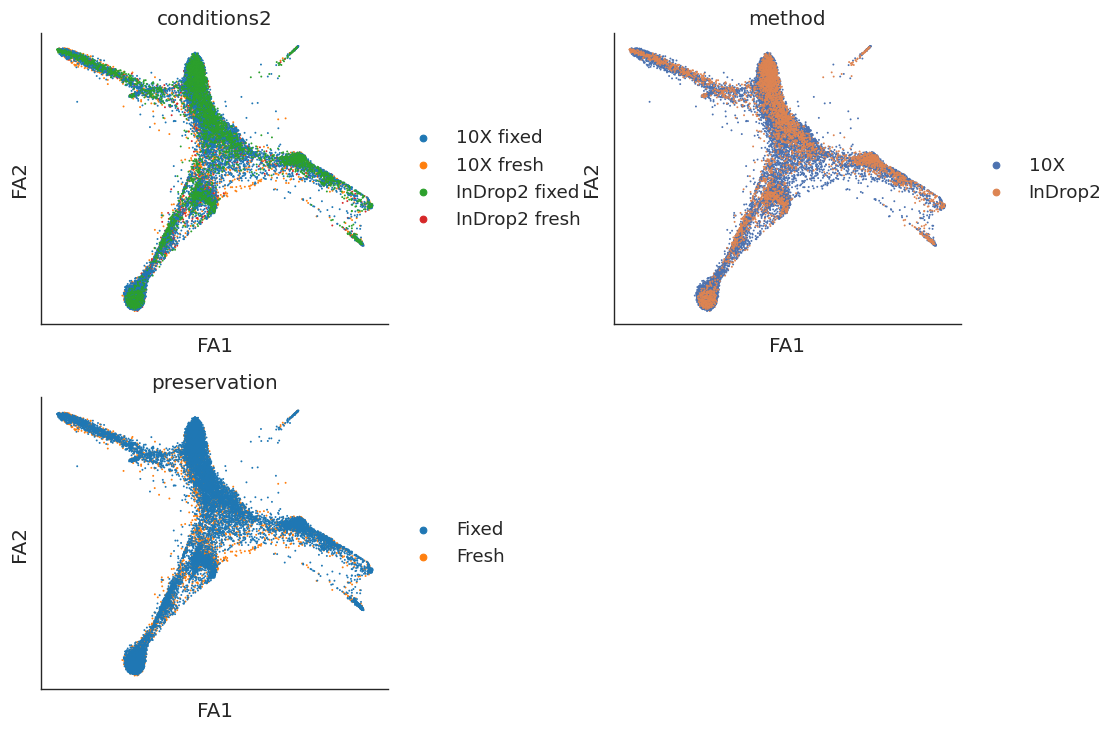

In [41]:
sc.pl.draw_graph(adata, color = ['conditions2', 'method', 'preservation'], ncols=2, wspace=0.5)

In [52]:
# Run diffusion maps

dm_res = palantir.utils.run_diffusion_maps(adata, n_components=10,knn=30, pca_key = 'X_pca_harmony')
ms_data = palantir.utils.determine_multiscale_space(adata, n_eigs = 10)
imputed_X = palantir.utils.run_magic_imputation(adata)

Determing nearest neighbor graph...


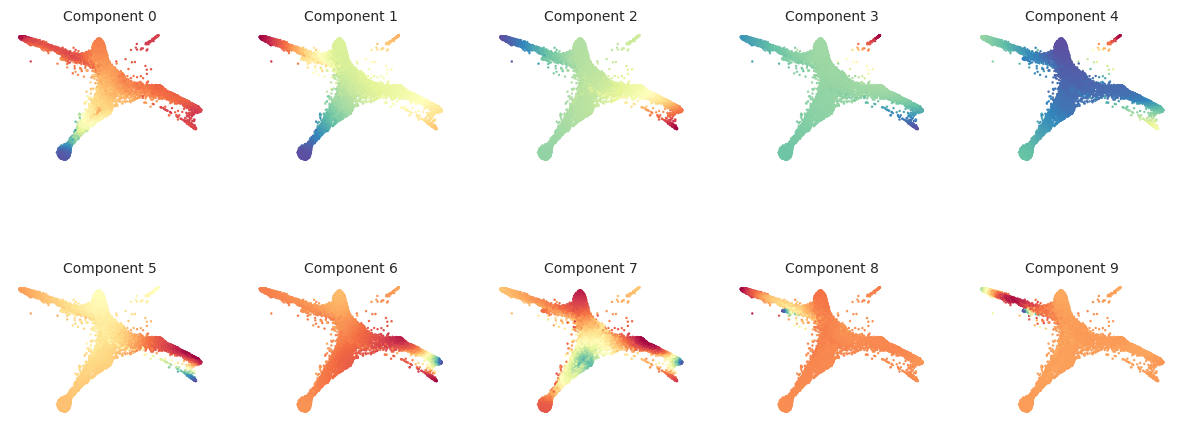

In [53]:
palantir.plot.plot_diffusion_components(adata, embedding_basis = 'X_draw_graph_fa')
plt.show()

In [ ]:
palantir.utils.early_cell(adata, celltype='HSC', celltype_column='cell_type')

In [ ]:
pr_res = palantir.core.run_palantir(
    adata, early_cell = '13947628', num_waypoints=1200, use_early_cell_as_start=True,knn=30 )

In [ ]:
palantir.plot.plot_palantir_results(adata, s=3, embedding_basis='X_draw_graph_fa')
plt.show()

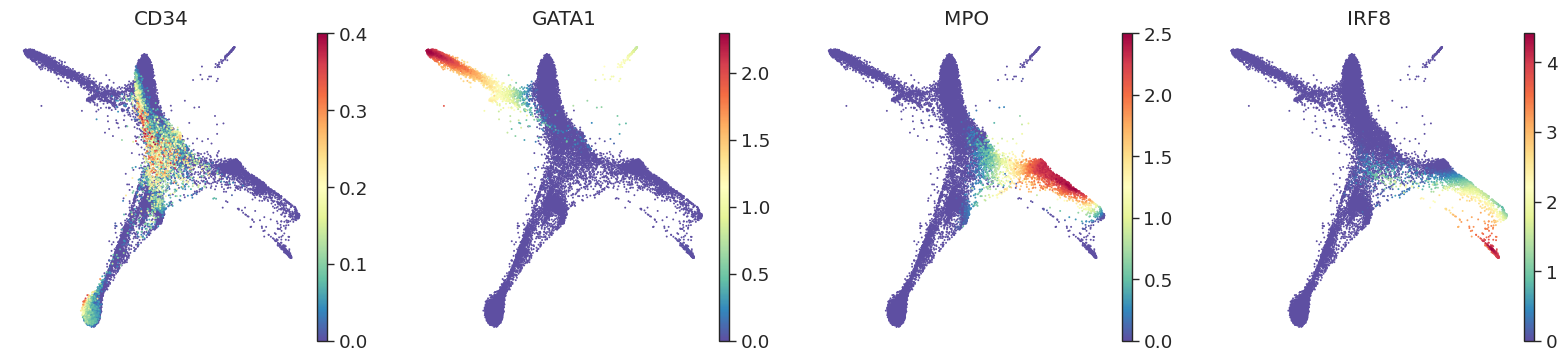

In [58]:
sc.pl.embedding(
    adata,
    basis="X_draw_graph_fa",
    layer="MAGIC_imputed_data",
    color=['CD34','GATA1', "MPO", "IRF8"],
    frameon=False,
    #use_raw=True,
    #vmax='p99'
)
plt.show()

In [129]:
adata

AnnData object with n_obs × n_vars = 15372 × 3324
    obs: 'barcode', 'library', 'total_counts', 'pct_counts_mito', 'conditions', 'conditions2', 'preservation', 'method', 'doublet_score', 'potential_doublet', 'top3pct_dbtl_score', 'top5pct_dbtl_score', 'top10pct_dbtl_score', 'no_dblt', 'n_counts', 'cell_typist_pred_low', 'leiden_res_0.8', 'cell_typist_pred_high', 'cell_typist_pred_low_no_voting', 'cell_type', 'S_score', 'G2M_score', 'phase', 'palantir_pseudotime', 'palantir_entropy'
    var: 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'conditions2_colors', 'draw_graph', 'log1p', 'neighbors', 'pca', 'preservation_colors', 'umap', 'hvg', 'method_colors', 'cell_type_colors', 'DM_EigenValues', 'palantir_waypoints'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap', 'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'palantir_fate_probabilities'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'connectivi

In [9]:
palantir.presults.select_branch_cells(adata)

array([[ True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False],
       [ True,  True, False,  True, False,  True],
       ...,
       [False, False, False, False, False,  True],
       [ True,  True, False, False, False,  True],
       [ True, False, False,  True, False, False]])

In [10]:
columns = {
'11107283':'pDC',
'11258012':'Mast',
'11819240':'Mega', 
'12083531':'Mono', 
'13954944':'Ery',
'8658789':'Lym'
}
adata.obsm['palantir_fate_probabilities'].rename(columns=columns, inplace = True)
adata.obsm['branch_masks'].rename(columns=columns, inplace = True)

In [11]:
adata

AnnData object with n_obs × n_vars = 15372 × 3324
    obs: 'barcode', 'library', 'total_counts', 'pct_counts_mito', 'conditions', 'conditions2', 'preservation', 'method', 'doublet_score', 'potential_doublet', 'top3pct_dbtl_score', 'top5pct_dbtl_score', 'top10pct_dbtl_score', 'sp_cl_all_cells_w_dblts_spring_500', 'removed_as_dblt1', 'sp_cl_all_cells_wo_dblt1_spring_500', 'removed_as_dblt2', 'no_dblt', 'n_counts', 'pheno_leiden', 'pheno_leiden_res_0.1', 'pheno_leiden_res_0.2', 'pheno_leiden_res_0.3', 'pheno_leiden_res_0.4', 'sp_cl_9', 'sp_cl_10', 'sp_cl_11', 'sp_cl_12', 'sp_cl_13', 'cell_typist_pred', 'S_score', 'G2M_score', 'phase', 'palantir_pseudotime', 'palantir_entropy'
    var: 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DM_EigenValues', 'X_lin_cptt', 'X_log_z', 'conditions2_colors', 'conditions_colors', 'draw_graph', 'hvg', 'log1p', 'method_colors', 'neighbors', 'palantir_waypoints', 'pca', 'preservation_colors', 'u

In [12]:
adata.obsm['branch_masks']

,pDC,Mast,Mega,Mono,Ery,Lym
1239,True,True,True,True,True,True
4688,False,False,False,False,False,False
5713,True,True,False,True,False,True
7475,False,False,False,False,False,False
9116,False,False,False,False,False,False
...,...,...,...,...,...,...
14031901,False,False,False,False,True,False
14031922,True,True,True,True,True,True
14031952,False,False,False,False,False,True
14031962,True,True,False,False,False,True


In [ ]:
pr_res.branch_probs

In [14]:
gene_trends = palantir.presults.compute_gene_trends(
    adata,
    expression_key="MAGIC_imputed_data",
)

pDC
[2023-12-29 16:20:19,940] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (7,876) and rank = 1.0.
[2023-12-29 16:20:19,941] [INFO    ] Using covariance function Matern52(ls=1.0).
Mast
[2023-12-29 16:20:23,078] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (6,467) and rank = 1.0.
[2023-12-29 16:20:23,079] [INFO    ] Using covariance function Matern52(ls=1.0).
Mega
[2023-12-29 16:20:24,741] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (3,052) and rank = 1.0.
[2023-12-29 16:20:24,742] [INFO    ] Using covariance function Matern52(ls=1.0).
Mono
[2023-12-29 16:20:26,120] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (6,028) and rank = 1.0.
[2023-12-29 16:20:26,124] [INFO    ] Using covariance function Matern52(ls=1.0).
Ery
[2023-12-29 16:20:27,868] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (3,952) and rank = 1.0.
[2023-12-29 16:20:

In [ ]:
genes = ['GATA1',"MPO", "LYZ", 'VPREB3', 'ITGA2B', 'CD41']
palantir.plot.plot_gene_trends(adata, genes)
plt.show()

In [24]:
path = 'outputs/CD34_gene_trends_v2.xlsx'

# Create an ExcelWriter object
with pd.ExcelWriter(path, engine='xlsxwriter') as writer:
    # Iterate through the dictionary items and save each DataFrame to a separate sheet
    for i in gene_trends.keys():
        gene_trends[i]['trends'].to_excel(writer, sheet_name=i, index=True, header=False)

In [56]:
fname = 'backups/final_sc_hvg_palantir_%dx%d_%s.h5ad'%(adata.shape[0],adata.shape[1],rz.now())
fname

'backups/final_sc_hvg_palantir_15372x3324_231130_12h58.h5ad'

In [62]:
# continuous per-cell metadata
contvars = ['total_counts','pct_counts_mito', 'n_counts', 'doublet_score', 'palantir_pseudotime', 'palantir_entropy',  'S_score', 'G2M_score']

# categorical
catvars = ['library',  'conditions',
       'preservation', 'potential_doublet',
       'leiden_res_0.8', 'cell_typist_pred_high',
       'cell_typist_pred_low_no_voting', 'cell_type']


In [63]:
# export_spring_plot was complaining about the data format, force the right one
for contvar in contvars:
    adata.obs[contvar] = adata.obs[contvar].astype(float).values
    
for catvar in catvars:
    adata.obs[catvar] = adata.obs[catvar].astype('category').values

In [64]:
path1 = "/Users/karolisgoda/Library/CloudStorage/GoogleDrive-karolisgoda@gmail.com/My Drive/MF/data/SPRING_dev-master/data/" 
project_dir = path1+'CD34_good/clean_good_sc_hvg/'
plot_name = 'palantir_cell_cycle'

In [65]:
sce.exporting.spring_project(adata, project_dir = project_dir, 
                             embedding_method = 'draw_graph', subplot_name = plot_name, cell_groupings = catvars,
                            custom_color_tracks = contvars)

Writing subplot to /Users/karolisgoda/Library/CloudStorage/GoogleDrive-karolisgoda@gmail.com/My Drive/MF/data/SPRING_dev-master/data/CD34_good/clean_good_sc_hvg/palantir_cell_cycle
